Consider few students who wants to choose a course after their 10+2, and they are confused about the choice of course based on each of their skill set. So they decides to consult various people like their cousins, teachers, parents, degree students, and working people. They post them various questions like why they chose, job opportunities with that course, course fee, etc. Finally, after consulting various people about the course he decides to take the course suggested by most people.

Create a dataset for the scenario and apply the various Ensemble learning techniques

1) Random forest ( represent as trees)

2) ADABOOST ( initial and final dataset)

3) XG Boost ( represent as trees)

https://www.kaggle.com/datasets/maedemaftouni/large-covid19-ct-slice-dataset

https://www.kaggle.com/code/advikmaniar/heart-attack-eda-prediction-with-9-model-95/input


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
data1=pd.read_csv("/content/heart.csv")
data1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
display(data1.describe())
display(data1.info())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

output
1    165
0    138
Name: count, dtype: int64


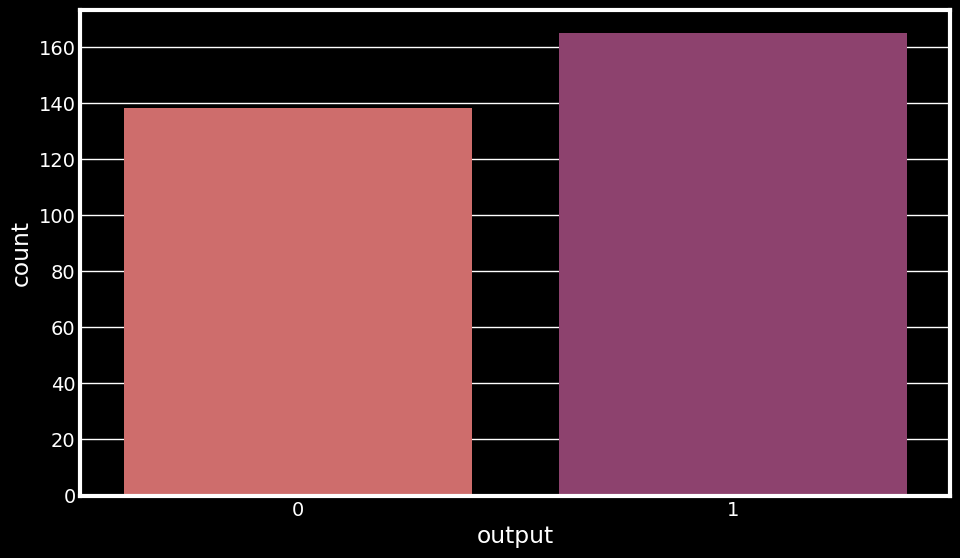

In [5]:
#Output variable
print(data1['output'].value_counts())
fig = plt.figure(figsize = (10,6))
# Ensure 'sns' refers to the seaborn library
import seaborn as sns
sns.countplot(x="output", data=data1, palette='flare') # x is the correct argument for what you are trying to plot
plt.show()

ax=px.pie(data1, names= "output" ,template= "plotly_dark",title="Output",hole=0.8)
ax.show()

In [6]:
#Classification columns
class_cols=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
class_data=data1[class_cols]

#Continuous columns
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

In [7]:
#Divide the data based on sex variable
X=data1[data1["sex"]==1].reset_index()
Y=data1[data1["sex"]==0].reset_index()
display(X.head(),Y.head())

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
4,14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [8]:
print("Percent of '1' at high risk of heart attack = {} %" .format(round((len(X[X["output"]==1])/len(X)*100),2)))
print("'1' average high-risk age = {} yrs\n" .format(round(X[X["output"]==1]["age"].mean())))

print("Percent of '0' at high risk of heart attack = {} %" .format(round((len(Y[Y["output"]==1])/len(Y)*100),2)))
print("Average high-risk age = {} yrs" .format(round(Y[Y["output"]==1]["age"].mean())))

Percent of '1' at high risk of heart attack = 44.93 %
'1' average high-risk age = 51 yrs

Percent of '0' at high risk of heart attack = 75.0 %
Average high-risk age = 55 yrs


In [13]:
#Data Splitting
X=data1.iloc[:,:13]
Y=data1["output"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65)

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [15]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

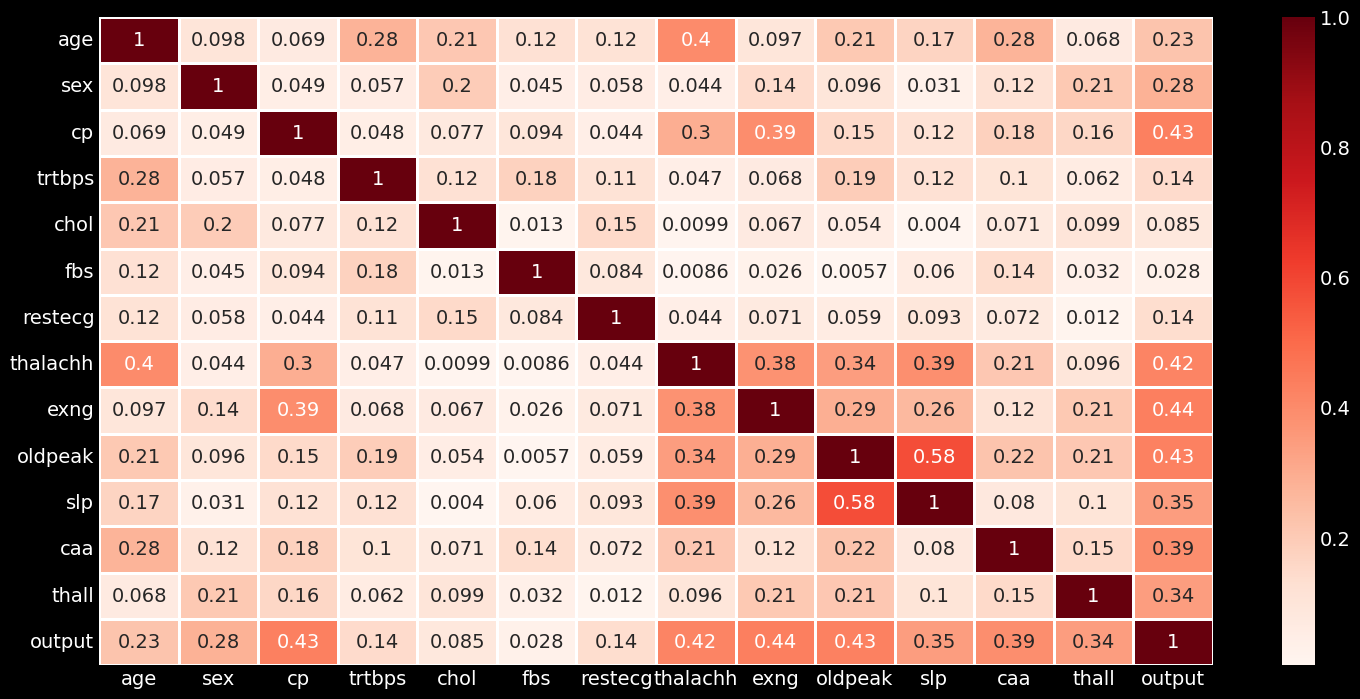

exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


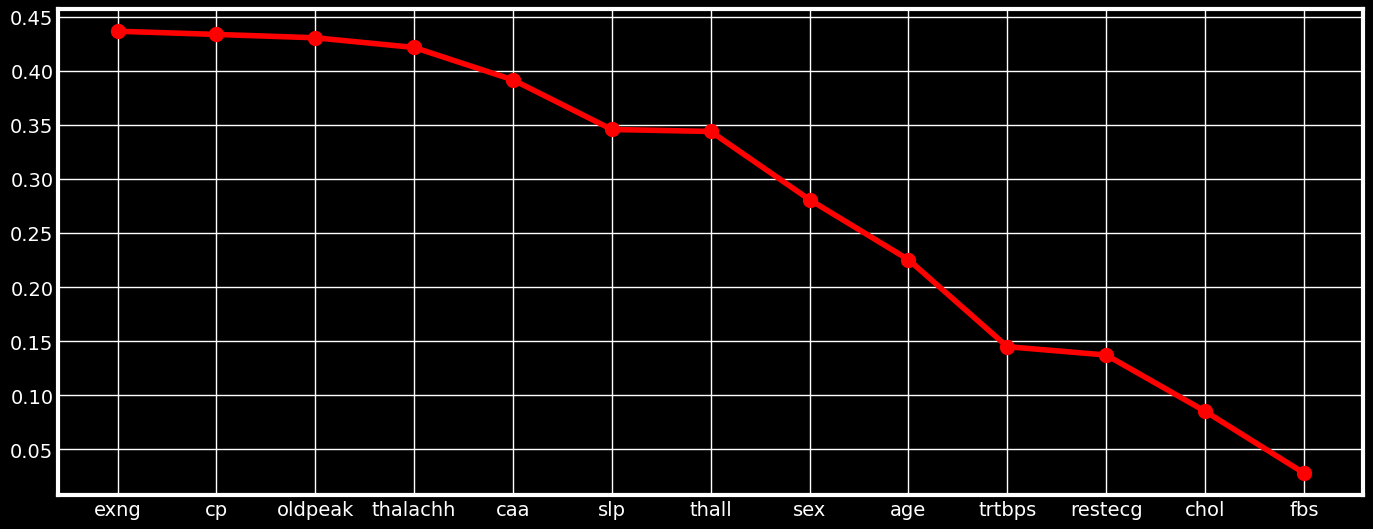

In [9]:
#Data PreProcessing
new_df=data1
plt.figure(figsize=(16,8))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
plt.show()

C=abs(corr["output"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="red")
plt.scatter(C.index,C,color="red",lw=5)
plt.show()

In [11]:
#Outlier treatment
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.29%
Column chol outliers = 5 => 1.65%
Column thalachh outliers = 1 => 0.33%
Column oldpeak outliers = 8 => 2.64%


Execution time of model: 0.68465 seconds


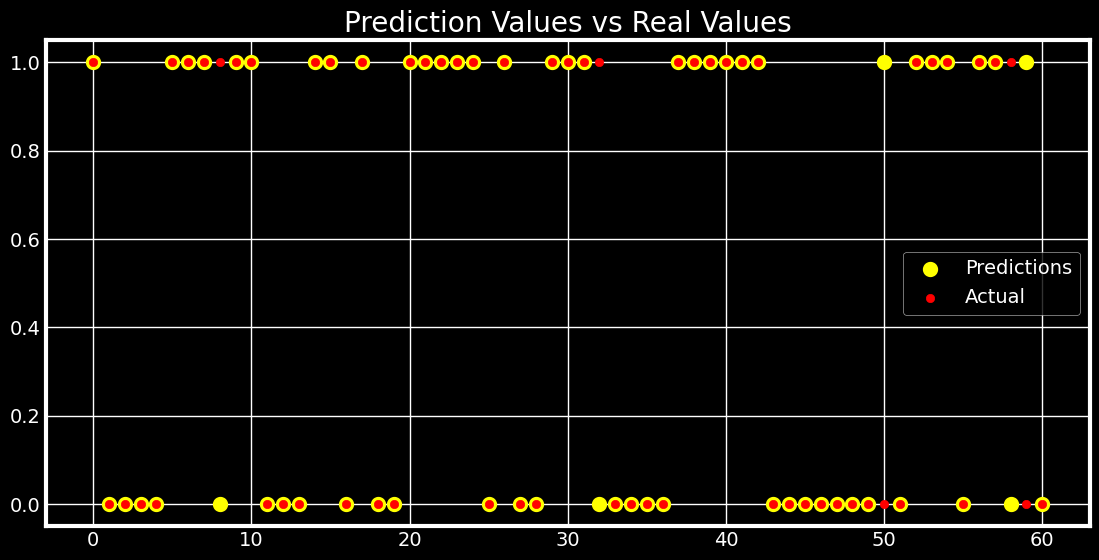

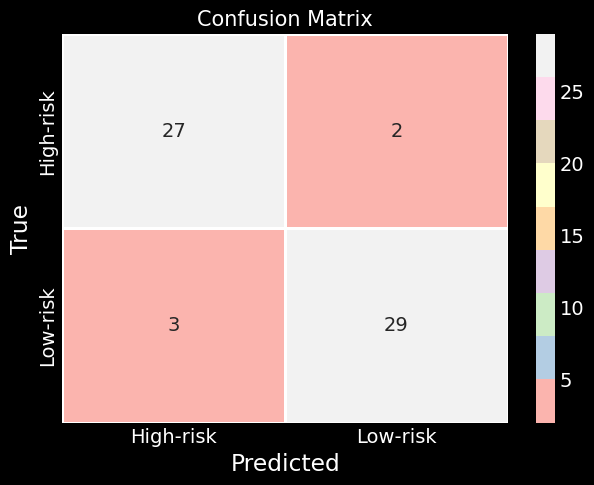

Precision: 0.935 
Recall: 0.906 
F1-Score: 0.921 
Accuracy: 91.803 %
Mean Square Error: 0.082


In [16]:
#RANDOM FOREST

#Build Model
start=time.time()

model_RF = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model_RF.fit(X_train,Y_train)
Y_pred=model_RF.predict(X_test)

end=time.time()

model_RF_time=end-start
model_RF_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_RF_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

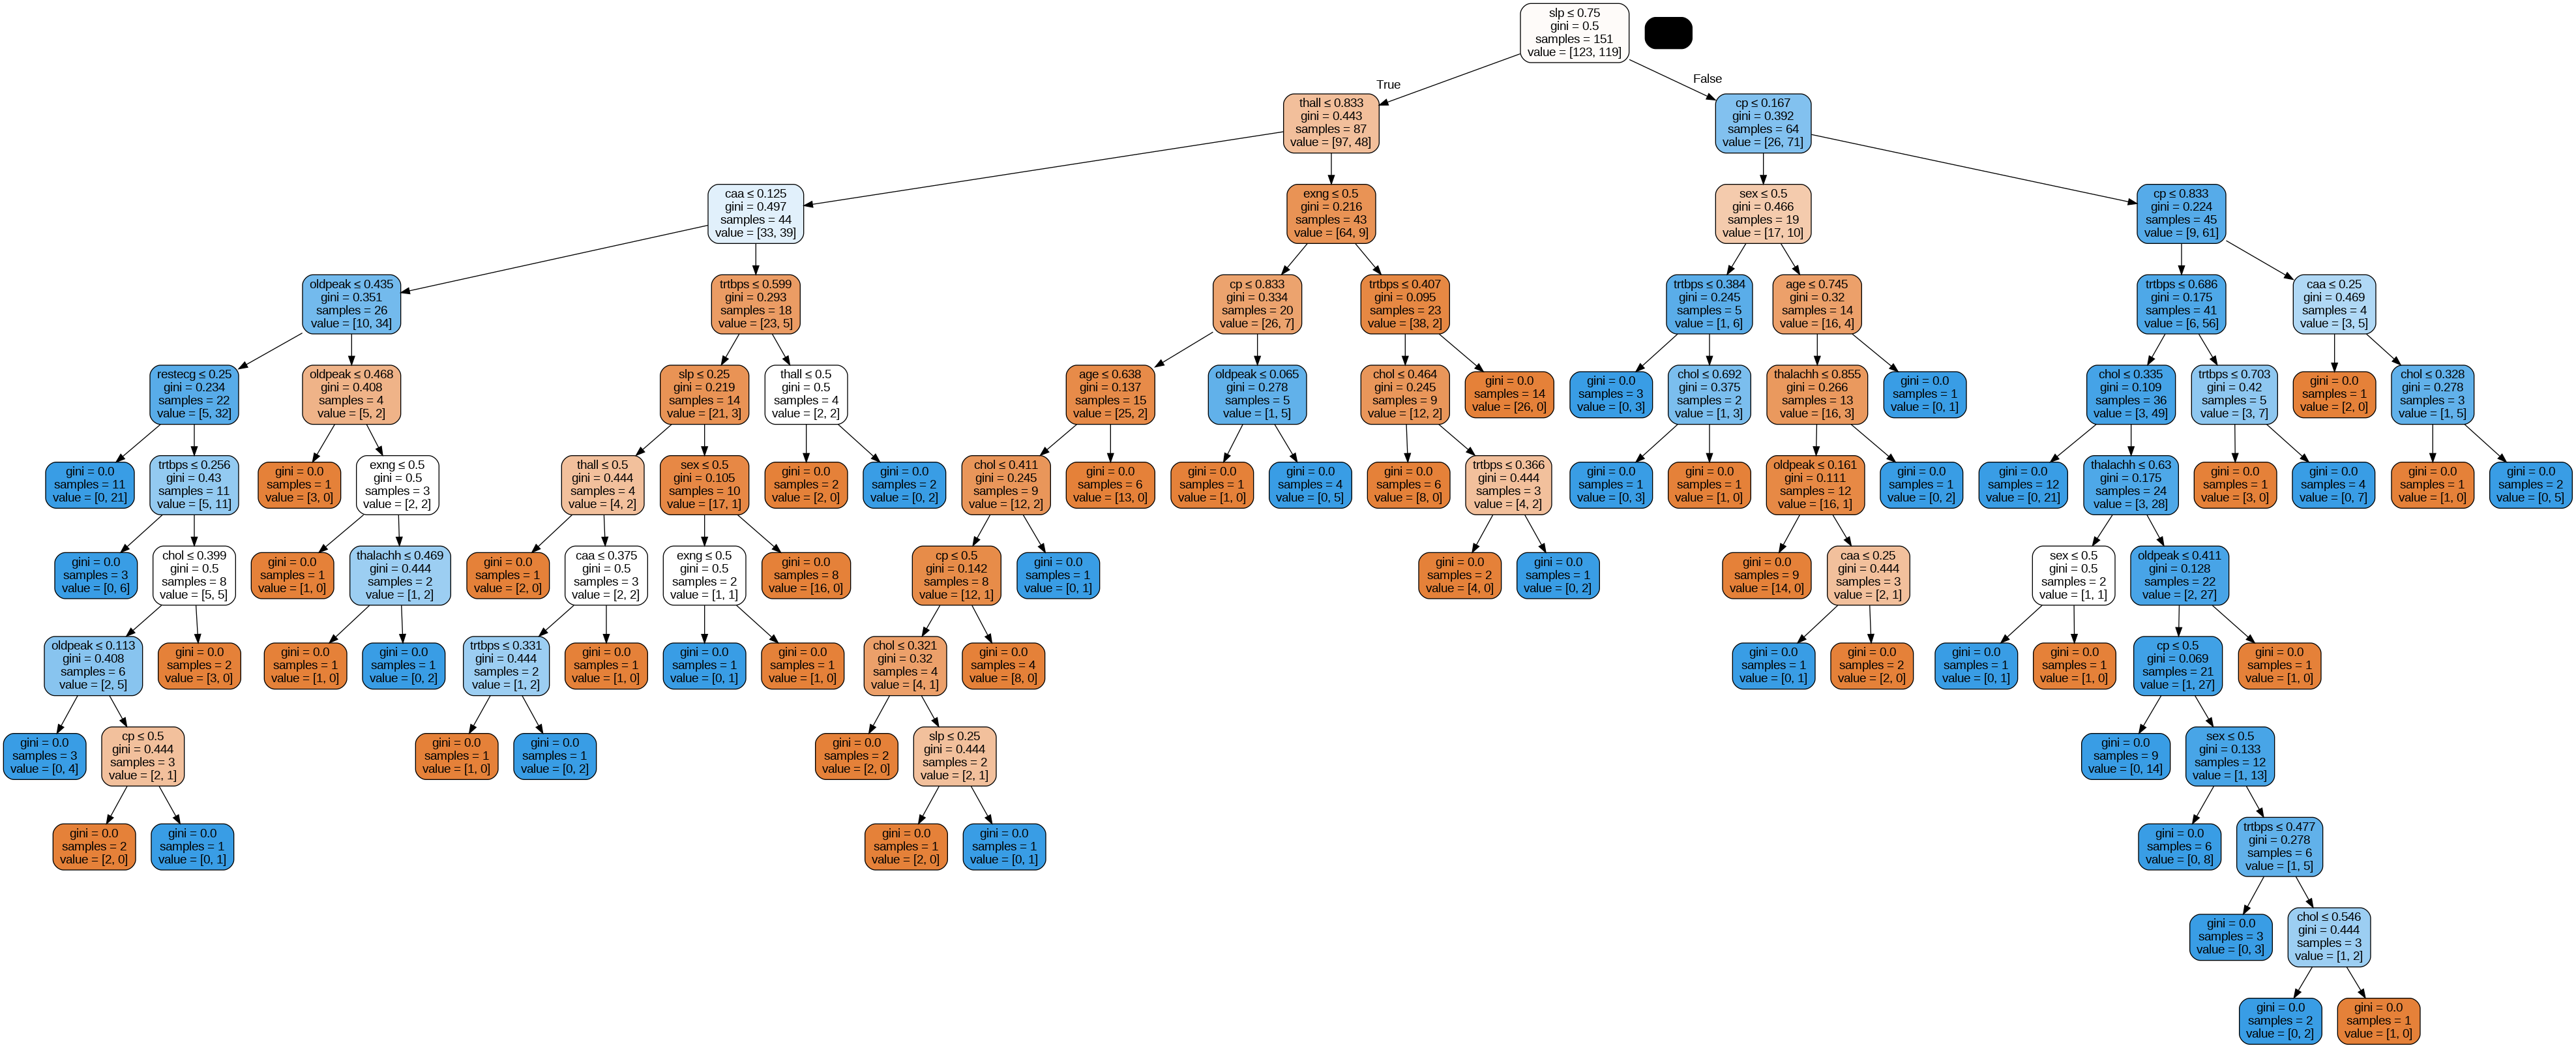

In [31]:
# random forest tree

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

tree_to_visualize = model_RF.estimators_[0]

dot_data = StringIO()
export_graphviz(tree_to_visualize, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())


In [34]:
# the number of inbetween decision trees

print(f"Number of decision trees in the Random Forest: {model_RF.n_estimators}")


Number of decision trees in the Random Forest: 300


In [36]:
# prompt: Plot the first 5 trees of random forest

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

for i in range(5):
  tree_to_visualize = model_RF.estimators_[i]

  dot_data = StringIO()
  export_graphviz(tree_to_visualize, out_file=dot_data,
                  filled=True, rounded=True,
                  special_characters=True,
                  feature_names=X.columns)

  # Create a graph from the DOT data
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

  Image(graph.create_png())


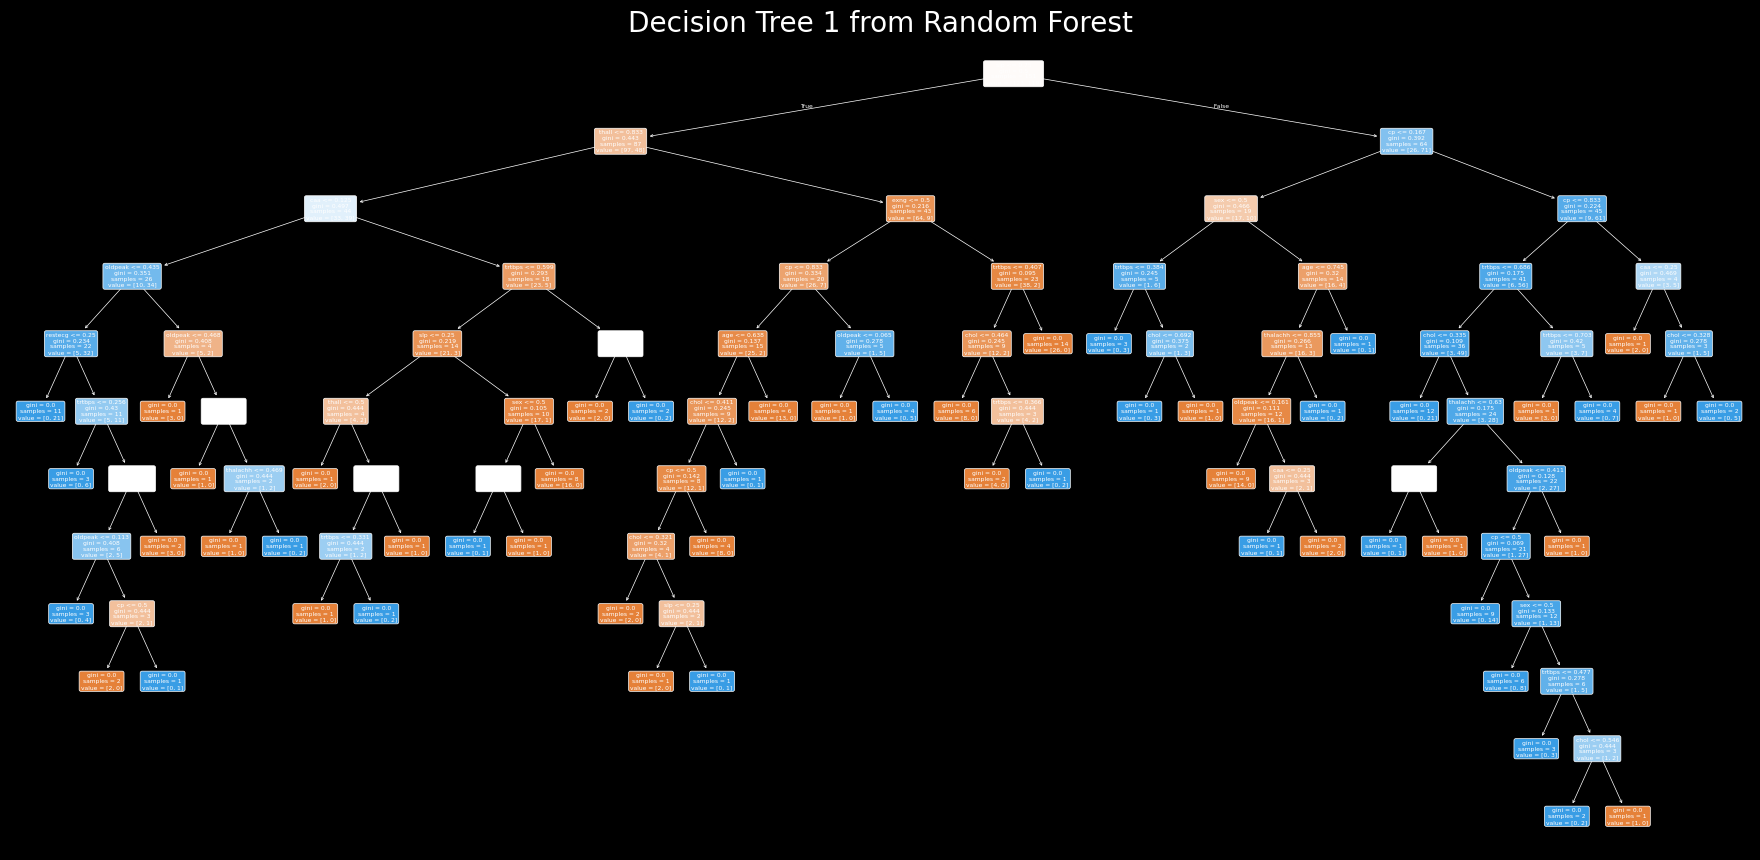

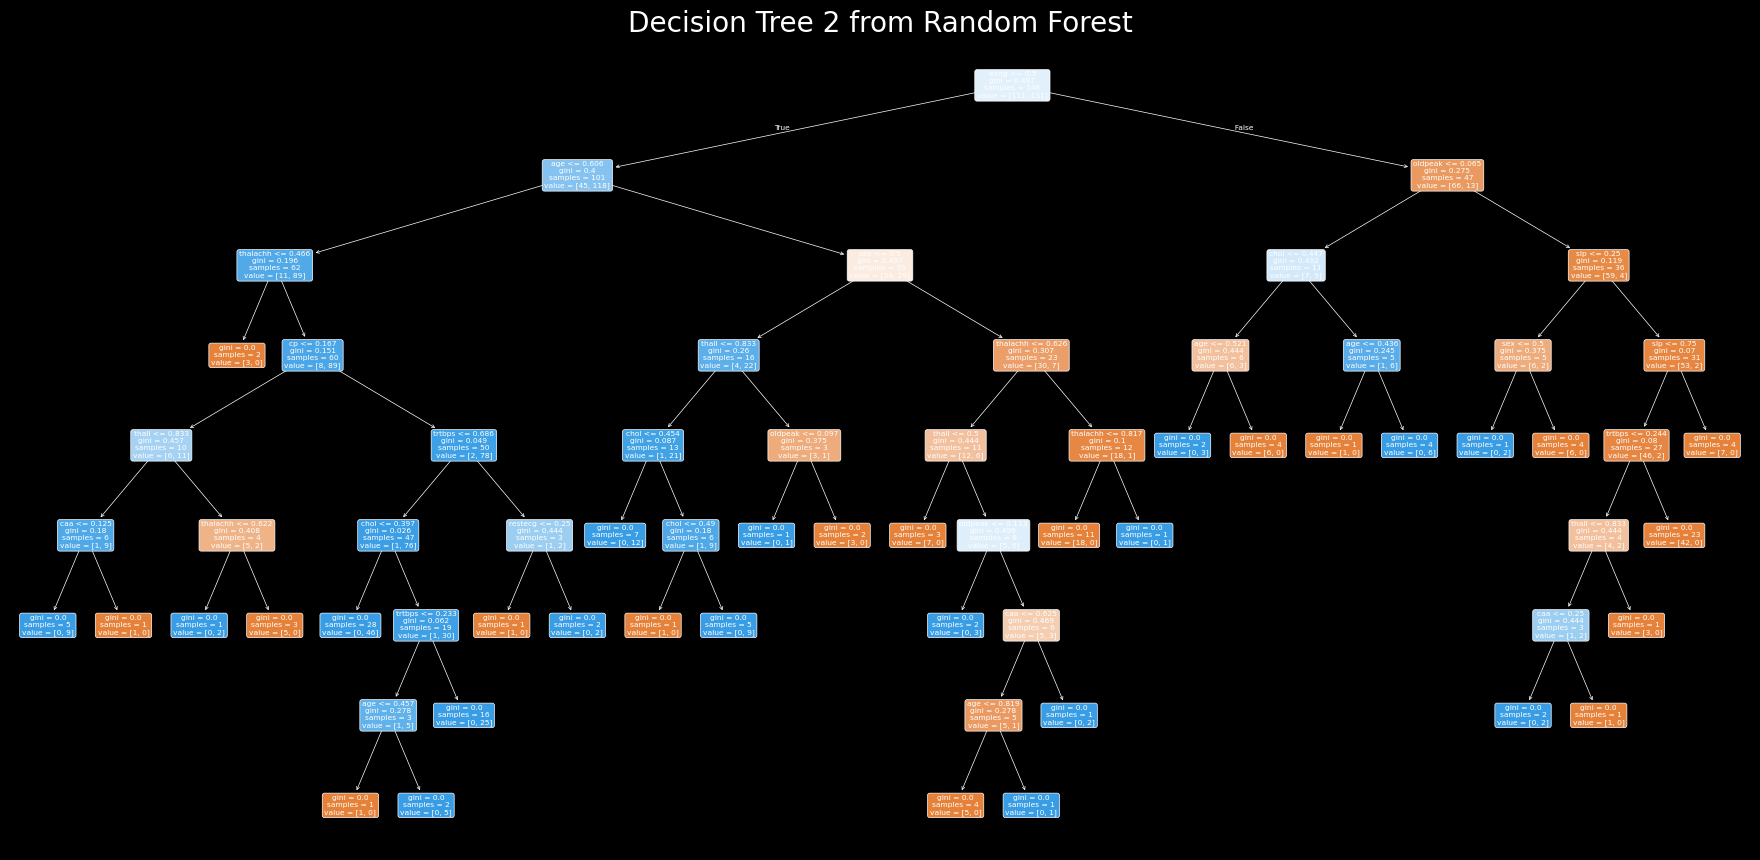

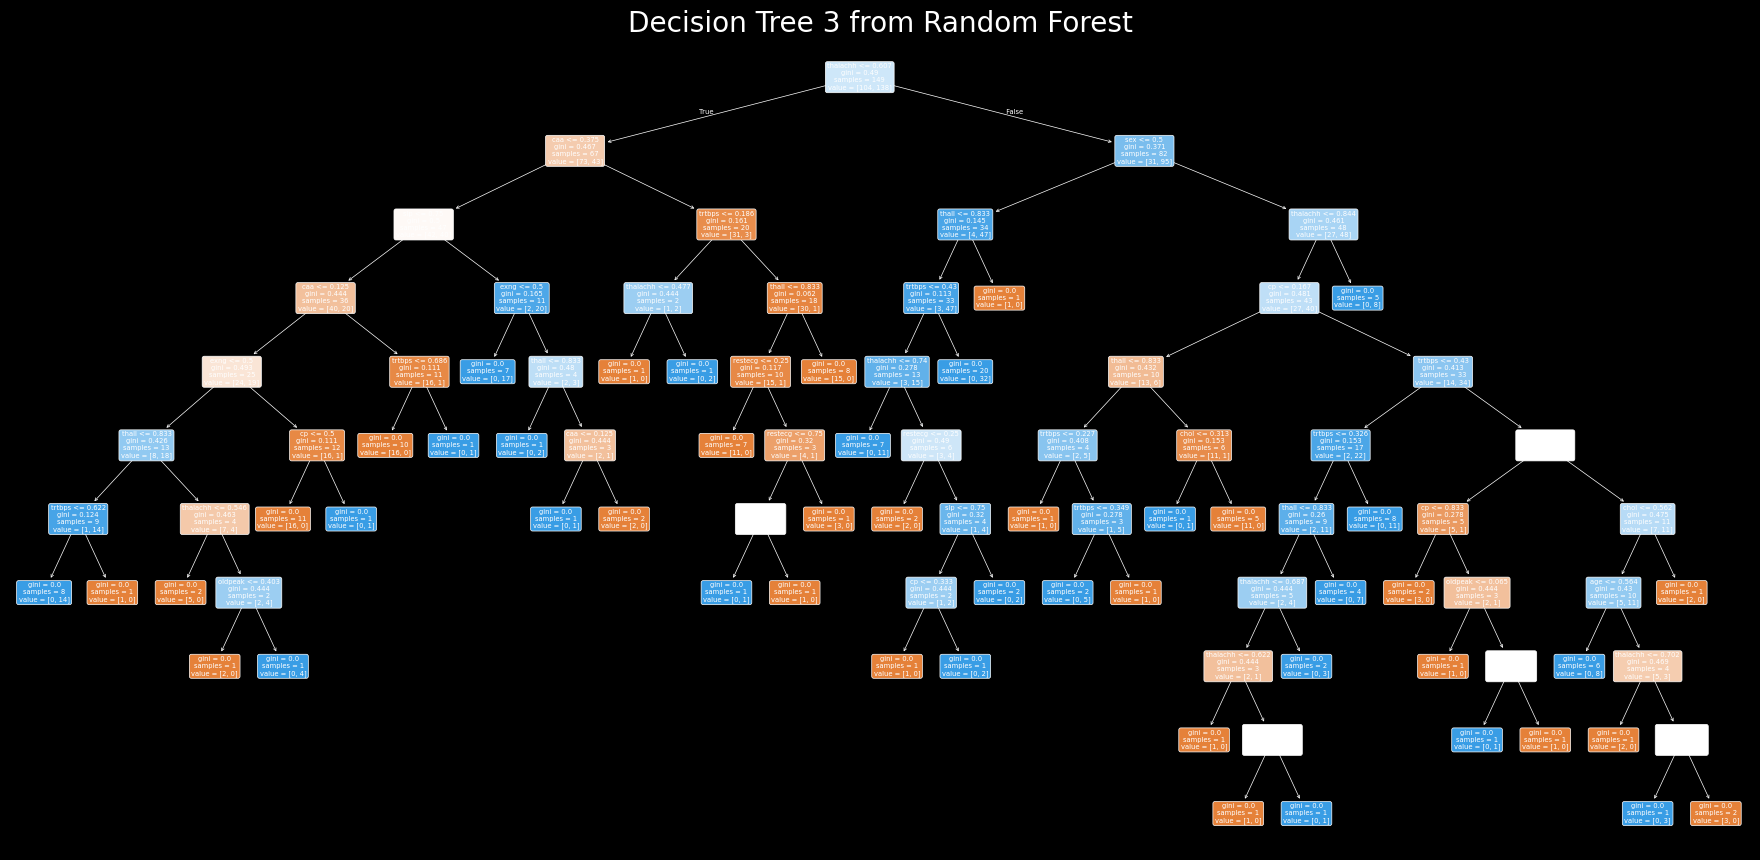

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Function to plot multiple trees
def plot_forest_trees(rf_model, num_trees=3):
    # Ensure the number of trees doesn't exceed the available estimators
    num_trees = min(num_trees, len(rf_model.estimators_))

    for i in range(num_trees):
        estimator = rf_model.estimators_[i]

        plt.figure(figsize=(20, 10))
        plot_tree(estimator, feature_names=X.columns, filled=True, rounded=True)
        plt.title(f"Decision Tree {i + 1} from Random Forest")
        plt.show()

# Plot the first 3 trees in the random forest
plot_forest_trees(model_RF, num_trees=3)


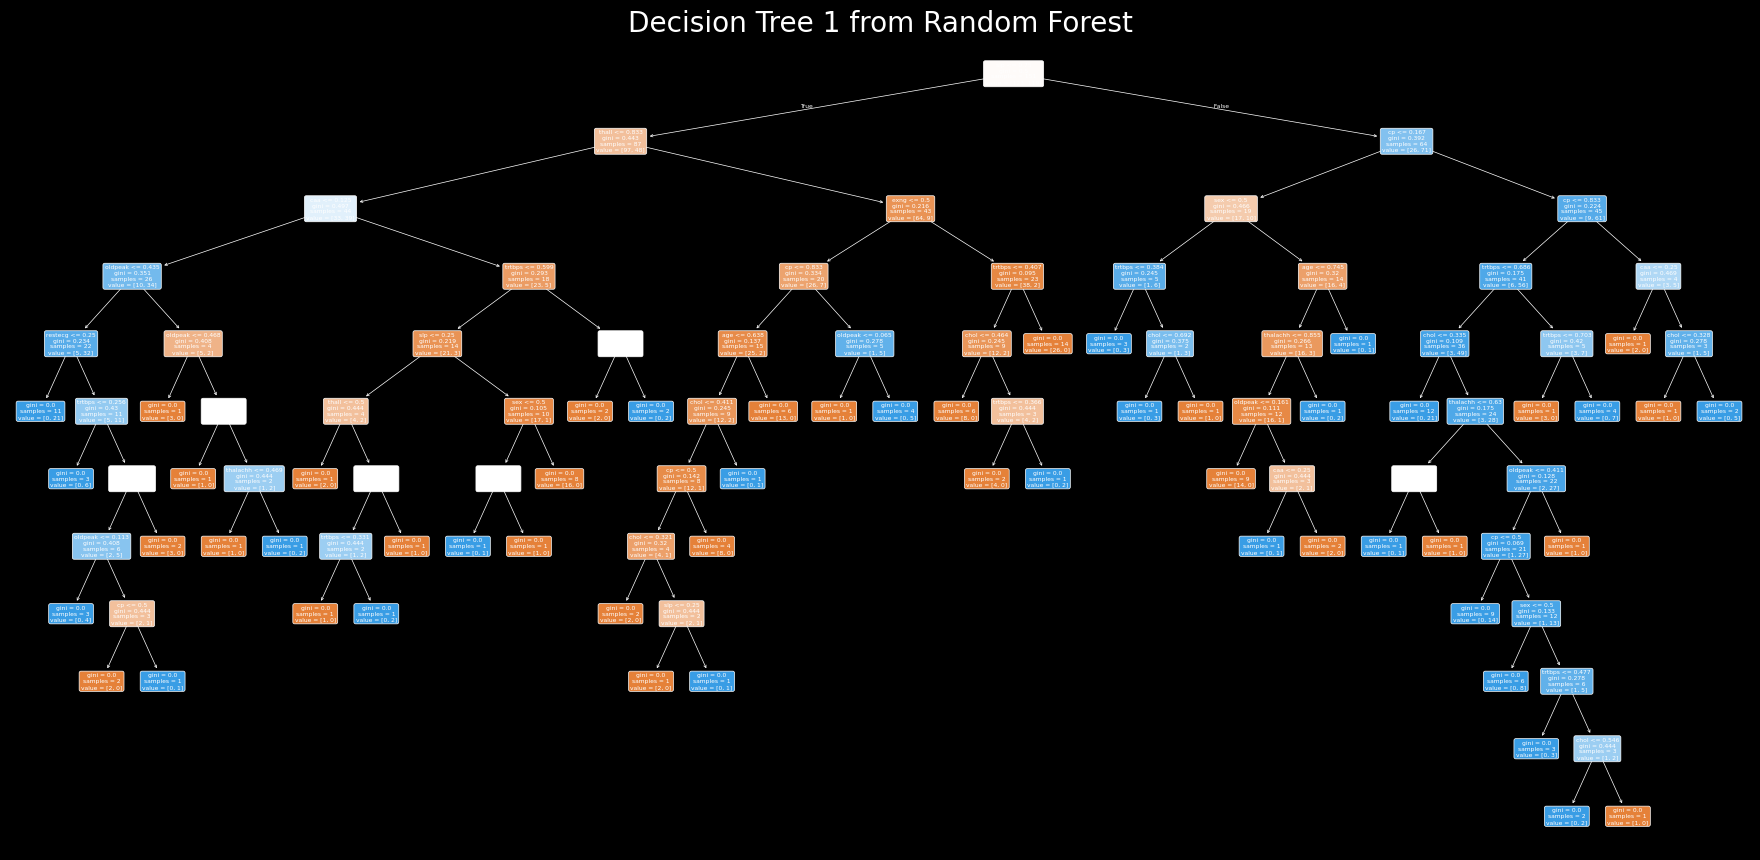

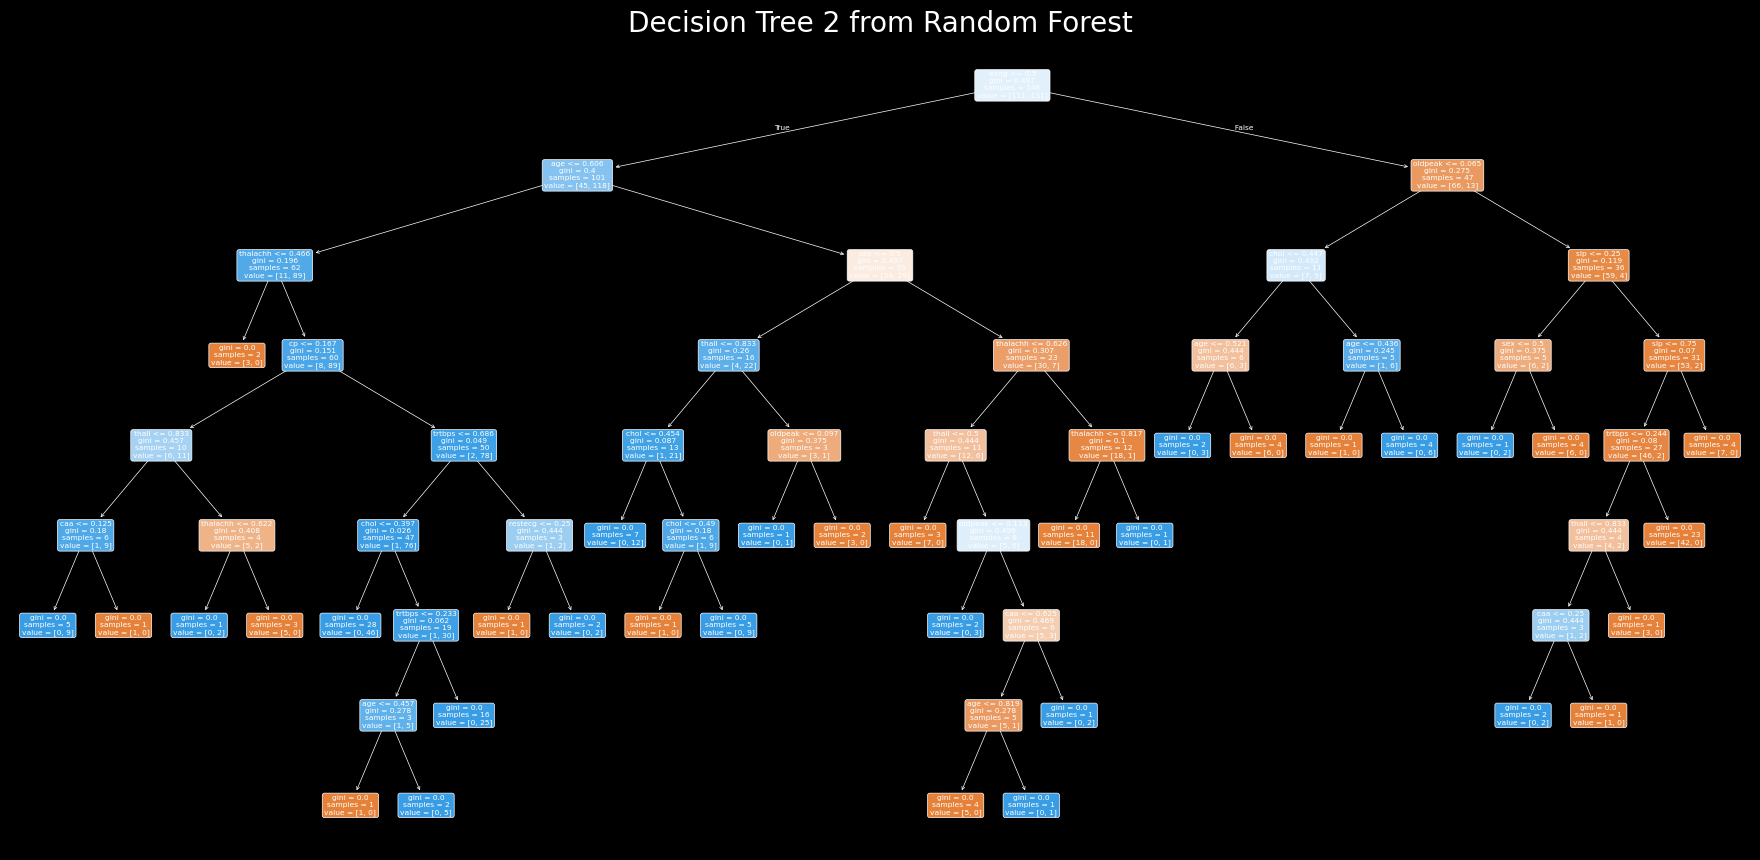

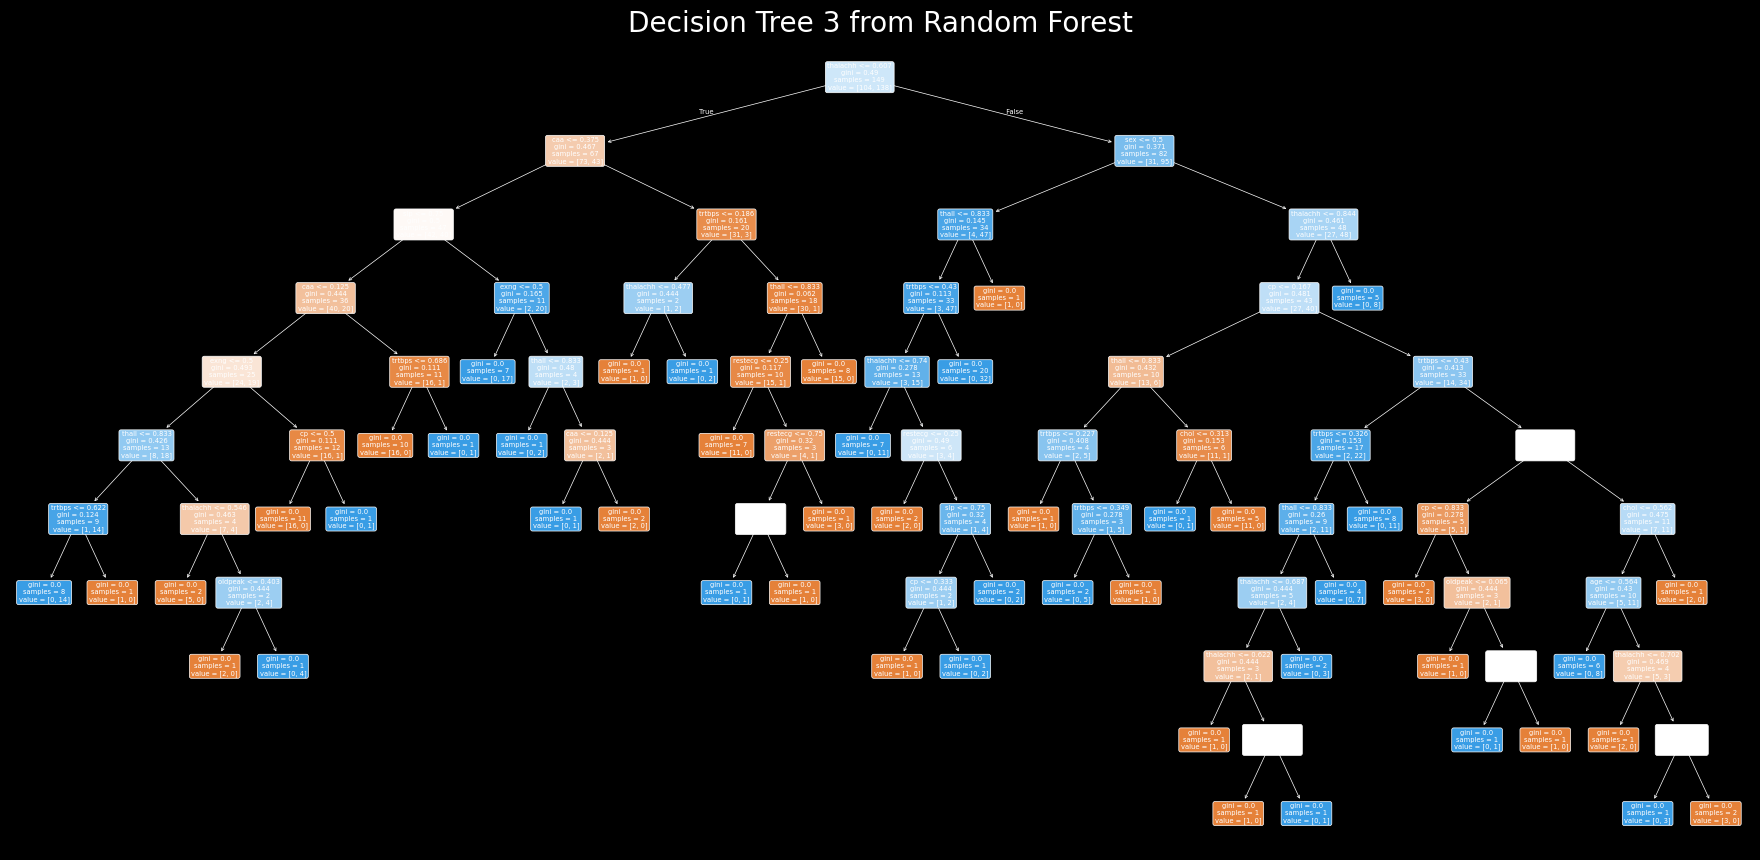

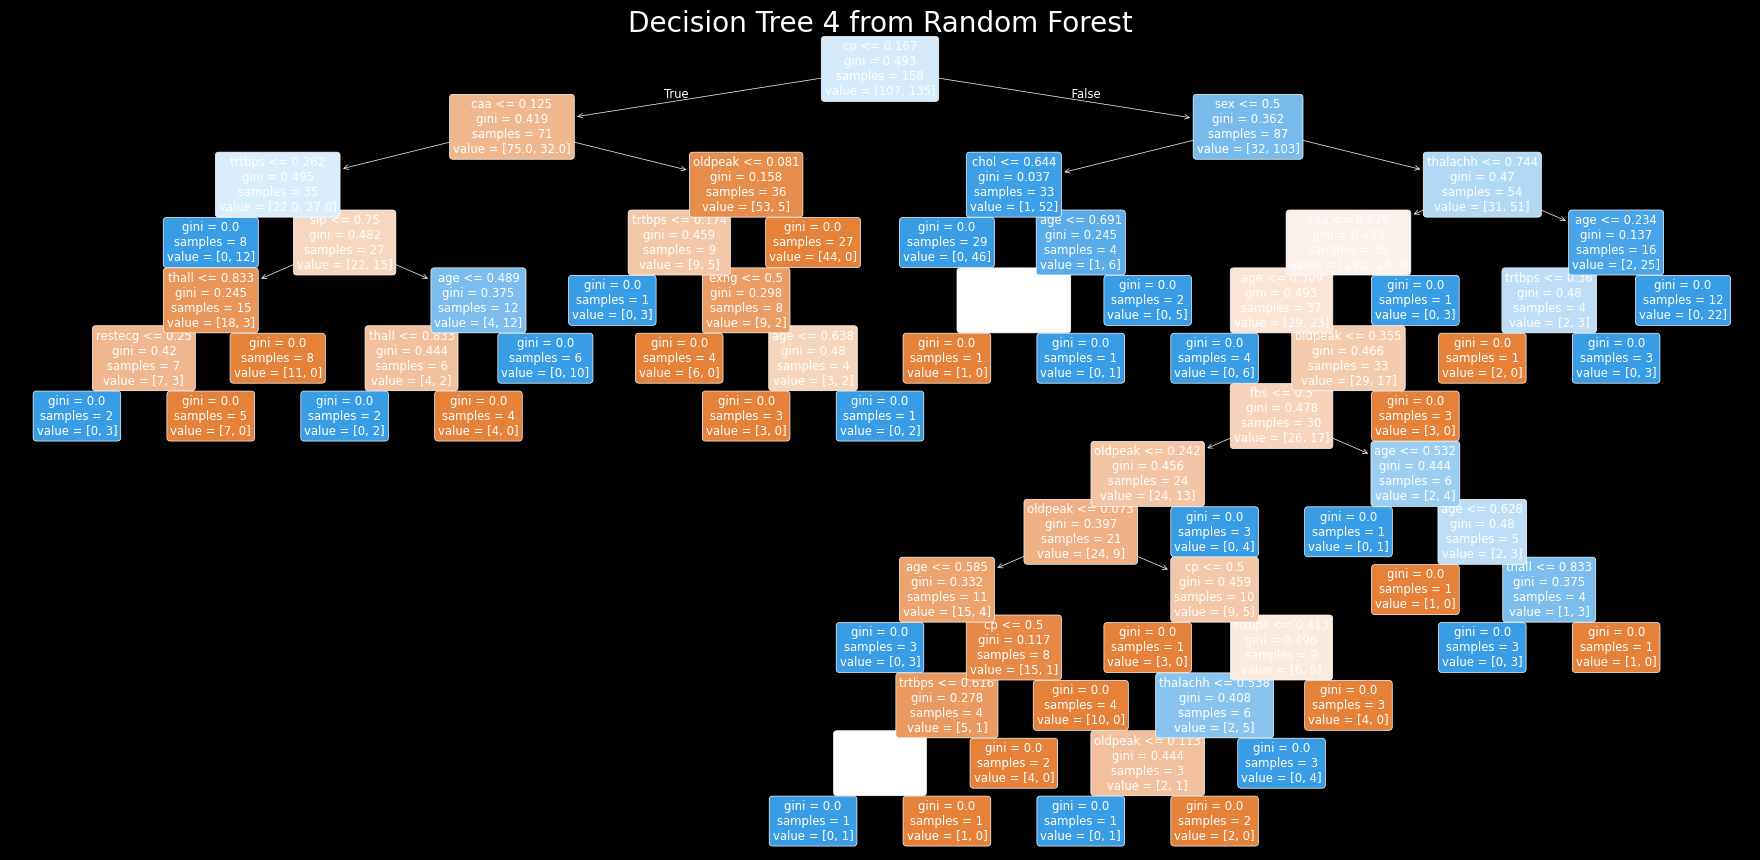

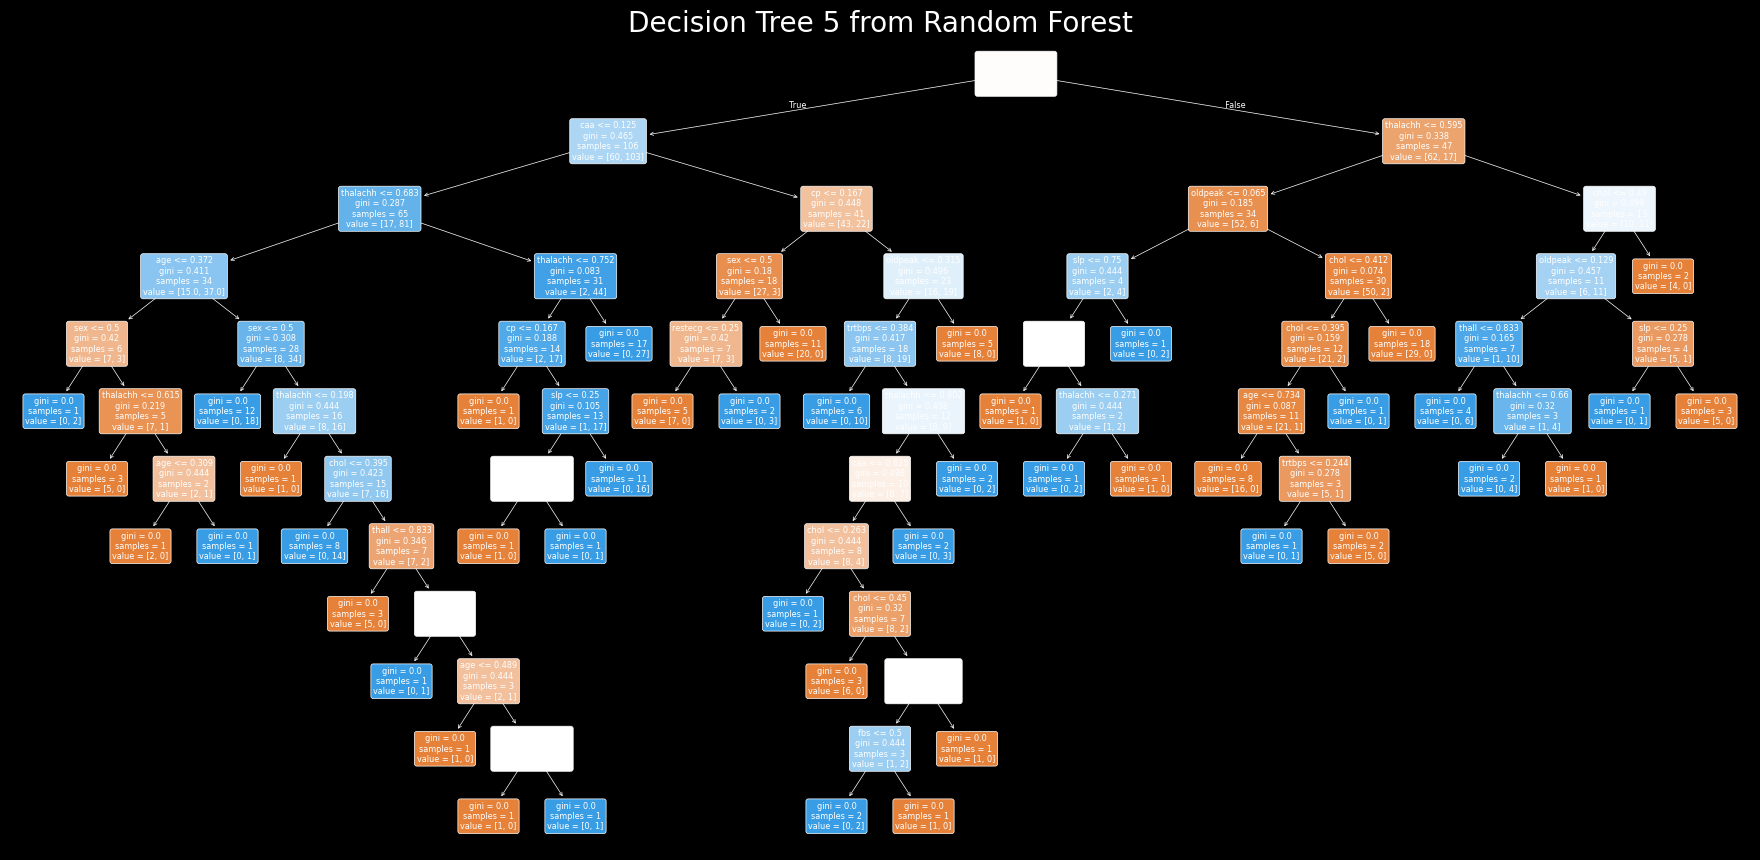

In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Function to plot multiple trees
def plot_forest_trees(rf_model, num_trees=3):
    # Ensure the number of trees doesn't exceed the available estimators
    num_trees = min(num_trees, len(rf_model.estimators_))

    for i in range(num_trees):
        estimator = rf_model.estimators_[i]

        plt.figure(figsize=(20, 10))
        plot_tree(estimator, feature_names=X.columns, filled=True, rounded=True)
        plt.title(f"Decision Tree {i + 1} from Random Forest")
        plt.show()

# Plot the first 3 trees in the random forest
plot_forest_trees(model_RF, num_trees=5)


Execution time of model: 0.12268 seconds


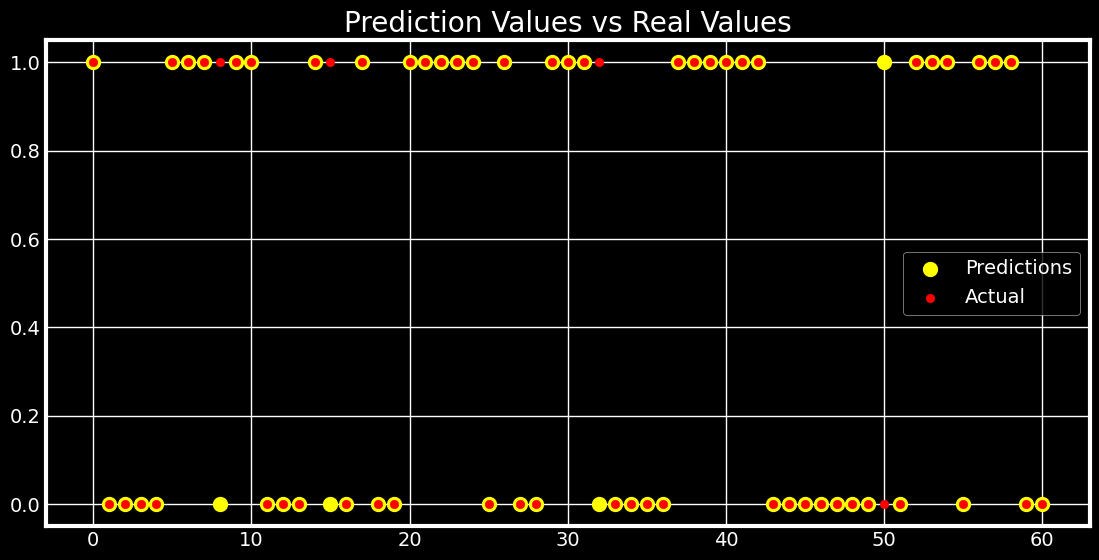

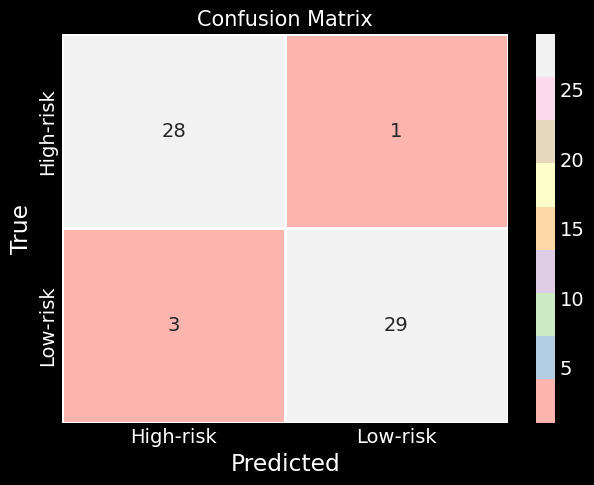

Precision: 0.967 
Recall: 0.906 
F1-Score: 0.935 
Accuracy: 93.443 %
Mean Square Error: 0.066


In [19]:
#Build Model ADABOOST
start=time.time()

model_ADA=AdaBoostClassifier(learning_rate= 0.15,n_estimators= 25)
model_ADA.fit(X_train,Y_train)
Y_pred= model_ADA.predict(X_test)

end=time.time()

model_ADA_time=end-start
model_ADA_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_ADA_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

In [20]:
#  ADABOOST - initial and final dataset

import pandas as pd
# Build Model ADABOOST
start = time.time()

model_ADA = AdaBoostClassifier(learning_rate=0.15, n_estimators=25)
model_ADA.fit(X_train, Y_train)
Y_pred = model_ADA.predict(X_test)

end = time.time()

model_ADA_time = end - start
model_ADA_accuracy = round(accuracy_score(Y_test, Y_pred), 4) * 100  # Accuracy

print(f"Execution time of model: {round((model_ADA_time), 5)} seconds")

# Plot and compute metric
# compute(Y_pred, Y_test)


# Generate initial dataset
initial_dataset = pd.DataFrame(X_train, columns=X.columns)
initial_dataset['target'] = Y_train

# Generate final dataset (with updated weights)
final_dataset = initial_dataset.copy()
estimator_weights = model_ADA.estimator_weights_
sample_weights = model_ADA.estimator_weights_
for i in range(model_ADA.n_estimators):
    # You'll need to access the weights used by each estimator during training
    # This might be difficult without modifying the AdaBoostClassifier implementation
    # The following is a simplified representation
    # final_dataset['weight'] = final_dataset['weight'] * estimator_weights[i]

    # To get the updated weights, you might need to access internal workings of AdaBoost
    # This is not usually exposed publicly.
    # The following code is a placeholder
    # For accurate results, you may need to delve deeper into the algorithm's implementation
    # and potentially modify it to store and access weight information.
    pass

# Display or save the datasets as needed
print("Initial Dataset:")
print(initial_dataset.head())

print("\nFinal Dataset:")
print(final_dataset.head())


Execution time of model: 0.05742 seconds
Initial Dataset:
        age  sex        cp    trtbps      chol  fbs  restecg  thalachh  exng  \
0  0.851064  1.0  1.000000  0.767442  0.371134  1.0      0.0  0.458015   0.0   
1  0.255319  0.0  0.666667  0.209302  0.487973  0.0      0.0  0.770992   1.0   
2  0.744681  1.0  1.000000  0.186047  0.292096  0.0      0.0  0.557252   1.0   
3  0.808511  1.0  0.000000  0.767442  0.549828  0.0      0.0  0.282443   1.0   
4  0.638298  1.0  1.000000  0.465116  0.268041  0.0      0.5  0.694656   0.0   

    oldpeak  slp   caa     thall  target  
0  0.016129  0.5  0.25  0.666667     1.0  
1  0.000000  1.0  0.00  0.666667     1.0  
2  0.290323  0.5  0.00  0.666667     NaN  
3  0.241935  0.5  0.75  0.666667     NaN  
4  0.129032  1.0  0.50  0.666667     1.0  

Final Dataset:
        age  sex        cp    trtbps      chol  fbs  restecg  thalachh  exng  \
0  0.851064  1.0  1.000000  0.767442  0.371134  1.0      0.0  0.458015   0.0   
1  0.255319  0.0  0.666667 

In [25]:
# ADABOOST initial and final dataset as file

# Save initial dataset to a CSV file
initial_dataset.to_csv('adaboost_initial_dataset.csv', index=False)

# Save final dataset to a CSV file
final_dataset.to_csv('adaboost_final_dataset.csv', index=False)

# Download the files
from google.colab import files
files.download('adaboost_initial_dataset.csv')
files.download('adaboost_final_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Execution time of model: 0.25609 seconds


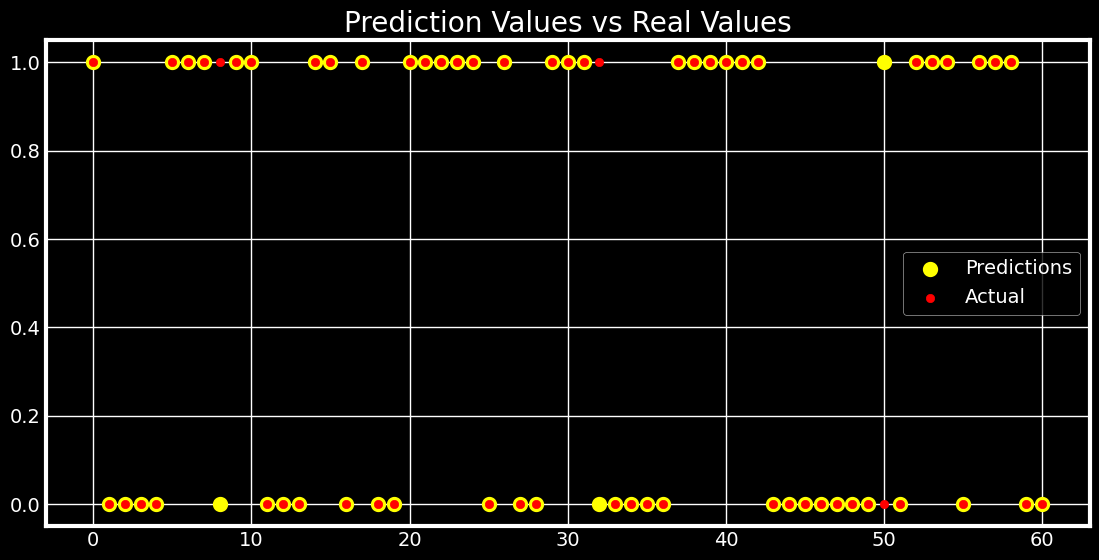

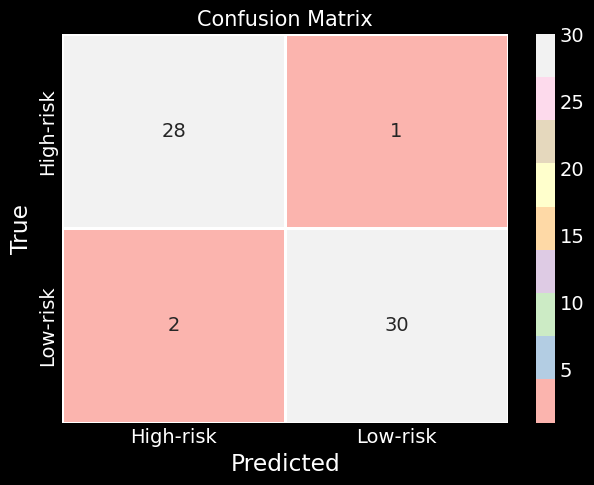

Precision: 0.968 
Recall: 0.938 
F1-Score: 0.952 
Accuracy: 95.082 %
Mean Square Error: 0.049


In [21]:
#Build Model XG BOOST
start=time.time()

model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,
                          max_depth=1,
                          n_estimators = 50,
                          colsample_bytree = 0.5)
model_xgb.fit(X_train,Y_train)
Y_pred = model_xgb.predict(X_test)

end=time.time()

model_xgb_time=end-start
model_xgb_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_xgb_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

<Figure size 2000x1000 with 0 Axes>

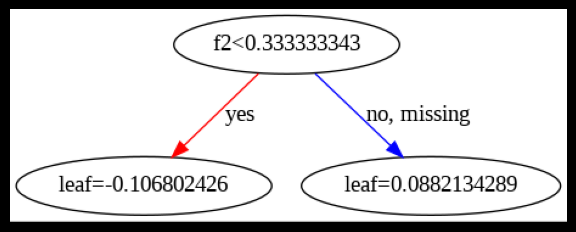

In [24]:
# XGBOOST as tree

from xgboost import plot_tree
import matplotlib.pyplot as plt

# Assuming you have trained your XGBoost model as 'model_xgb'

# Plot the first tree in the XGBoost model
plt.figure(figsize=(20, 10))
plot_tree(model_xgb, num_trees=0)  # num_trees specifies which tree to plot (0 for the first)
plt.show()


Execution time of model: 0.01605 seconds


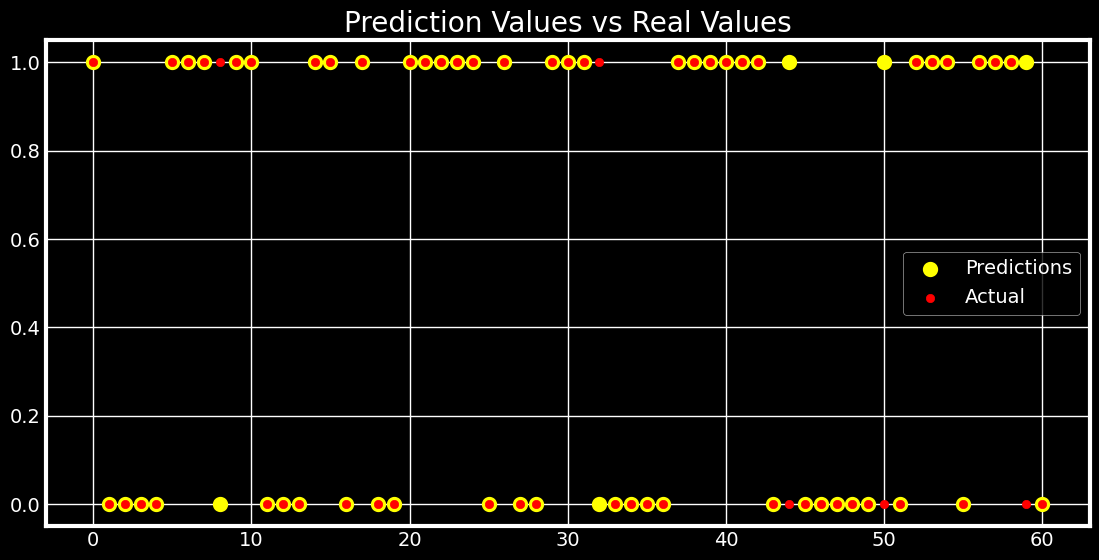

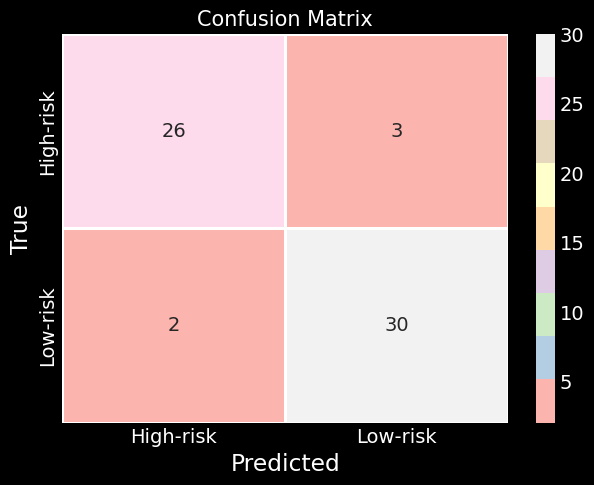

Precision: 0.909 
Recall: 0.938 
F1-Score: 0.923 
Accuracy: 91.803 %
Mean Square Error: 0.082
XGBoost Accuracy: 95.08
XGBoost Time: 0.2560911178588867

KNN Accuracy: 91.8
KNN Time: 0.016049861907958984

XGBoost performs better than KNN in terms of accuracy.
KNN is faster than XGBoost.


In [40]:
# Comparison  the xg boost with knn model

# Build Model KNN
start = time.time()

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, Y_train)
Y_pred = model_knn.predict(X_test)

end = time.time()

model_knn_time = end - start
model_knn_accuracy = round(accuracy_score(Y_test, Y_pred), 4) * 100  # Accuracy

print(f"Execution time of model: {round((model_knn_time), 5)} seconds")
# Plot and compute metric
compute(Y_pred, Y_test)


# Comparison between XGBoost and KNN
print("XGBoost Accuracy:", model_xgb_accuracy)
print("XGBoost Time:", model_xgb_time)

print("\nKNN Accuracy:", model_knn_accuracy)
print("KNN Time:", model_knn_time)

if model_xgb_accuracy > model_knn_accuracy:
    print("\nXGBoost performs better than KNN in terms of accuracy.")
elif model_knn_accuracy > model_xgb_accuracy:
    print("\nKNN performs better than XGBoost in terms of accuracy.")
else:
    print("\nBoth models have similar accuracy.")

if model_xgb_time < model_knn_time:
    print("XGBoost is faster than KNN.")
elif model_knn_time < model_xgb_time:
    print("KNN is faster than XGBoost.")
else:
    print("Both models have similar execution time.")


Predictions where KNN and AdaBoost differ:
     KNN Predictions  AdaBoost Predictions  Actual
85                 1                     0       1
216                1                     0       0
273                1                     0       0


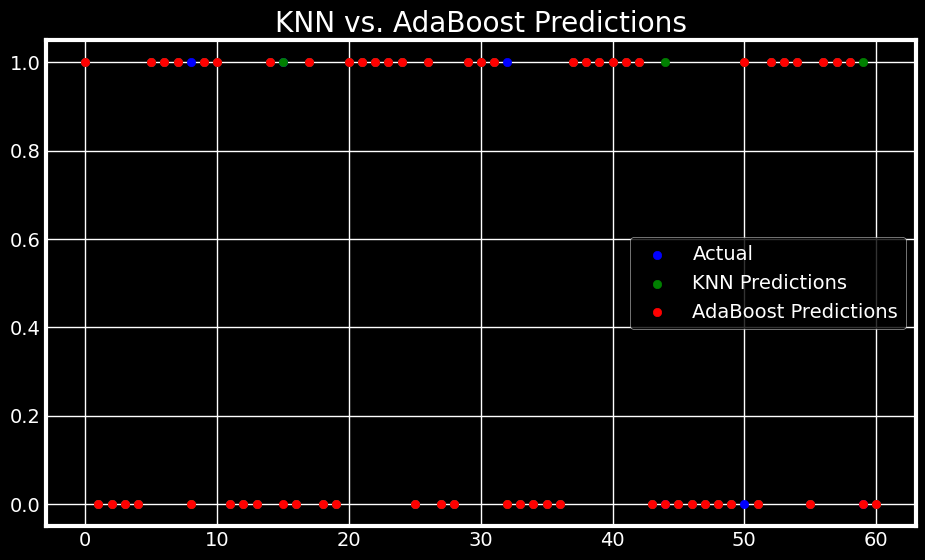

In [44]:
# prompt: Differentiate the predicted points from knn and adaboost

import pandas as pd
import matplotlib.pyplot as plt
# Predictions from KNN
Y_pred_knn = model_knn.predict(X_test)

# Predictions from AdaBoost
Y_pred_ada = model_ADA.predict(X_test)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'KNN Predictions': Y_pred_knn, 'AdaBoost Predictions': Y_pred_ada, 'Actual': Y_test})

# Identify the points where the predictions differ
different_predictions = predictions_df[predictions_df['KNN Predictions'] != predictions_df['AdaBoost Predictions']]

print("Predictions where KNN and AdaBoost differ:")
print(different_predictions)

# You can also visualize these differences using a scatter plot or other methods if needed
# For instance, you can plot the actual values against the KNN and AdaBoost predictions
# and highlight the points where they diverge.

plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, label='Actual', color='blue')
plt.scatter(range(len(Y_pred_knn)), Y_pred_knn, label='KNN Predictions', color='green')
plt.scatter(range(len(Y_pred_ada)), Y_pred_ada, label='AdaBoost Predictions', color='red')
plt.legend()
plt.title('KNN vs. AdaBoost Predictions')
plt.show()
